## (1). Import the Data 

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
iris_data = pd.read_csv(r"C:\Data\Iris.csv")
iris_data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
iris_data.shape

(150, 5)

In [4]:
iris_data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
iris_data.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [6]:
iris_data.Species.nunique()

3

In [7]:
iris_data.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

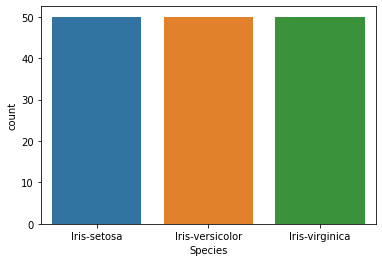

In [8]:
sns.countplot(x = iris_data.Species);

##  (2). Data Analysis

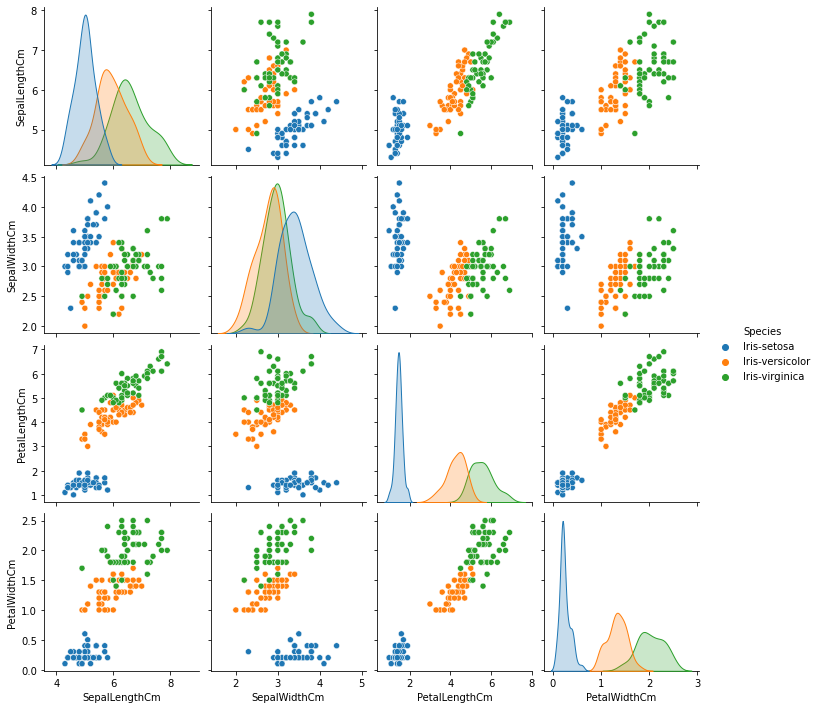

In [9]:
sns.pairplot(iris_data,hue='Species');

**Observations**

1. It looks like i don't have to consider all 4 variables to build my model. I can only consider either one of the following pairs:
 + PetalLength & SepalLength
 + PetalLength & SepalWidth
 + PetalLength & PetalWidth
 + PetalWidth & SepalLength


## (3). Data Prepration
- Identifying the inputes(X) & outputs(y)
- Split into train & test
- Preprocess the training data
- Preprocess the test data 

In [10]:
y = iris_data['Species']
X = iris_data[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]

In [11]:
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

In [12]:
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [13]:
# Data-preprocessing: Train & Test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, random_state= 0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(120, 4) (120,)
(30, 4) (30,)


In [14]:
# Data-preprocessing: Train & Test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state= 0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(112, 4) (112,)
(38, 4) (38,)


In [15]:
# Data-preprocessing: Train & Test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, random_state= 0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(105, 4) (105,)
(45, 4) (45,)


In [16]:
# Data-preprocessing: Standardizing the data 

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_transformed = scaler.fit_transform(X_train)
print(X_train_transformed.shape)

(105, 4)


In [17]:
X_train_transformed.describe()

# Error shows due to the type of x_trained_transformed converted into numpy.ndarray 
# when we transforms the X_train into X_train_transformed.

AttributeError: 'numpy.ndarray' object has no attribute 'describe'

In [18]:
type(X_train_transformed)

numpy.ndarray

In [19]:
X_train.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

In [20]:
X_train_transformed = pd.DataFrame(data=X_train_transformed, columns=X_train.columns)

X_train_transformed.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-1.023664,-2.378463,-0.182950,-0.291459
1,0.695175,-0.101903,0.930661,0.737219
2,0.924353,0.581065,1.042022,1.637313
3,0.122229,-1.923151,0.652258,0.351465
4,0.924353,-1.240183,1.097702,0.737219


In [21]:
type(X_train_transformed)

pandas.core.frame.DataFrame

In [22]:
X_train_transformed.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,1.050000e+02,1.050000e+02,1.050000e+02,1.050000e+02
mean,-1.249794e-15,-5.075305e-17,-1.438003e-16,-2.051269e-16
std,1.004796e+00,1.004796e+00,1.004796e+00,1.004796e+00
min,-1.825788e+00,-2.378463e+00,-1.519284e+00,-1.448722e+00
25%,-9.090745e-01,-5.572150e-01,-1.240881e+00,-1.191552e+00
50%,-1.069499e-01,-1.019031e-01,3.181746e-01,9.429550e-02
75%,6.951746e-01,5.810647e-01,7.636190e-01,8.658042e-01
max,2.299424e+00,3.085280e+00,1.710188e+00,1.637313e+00


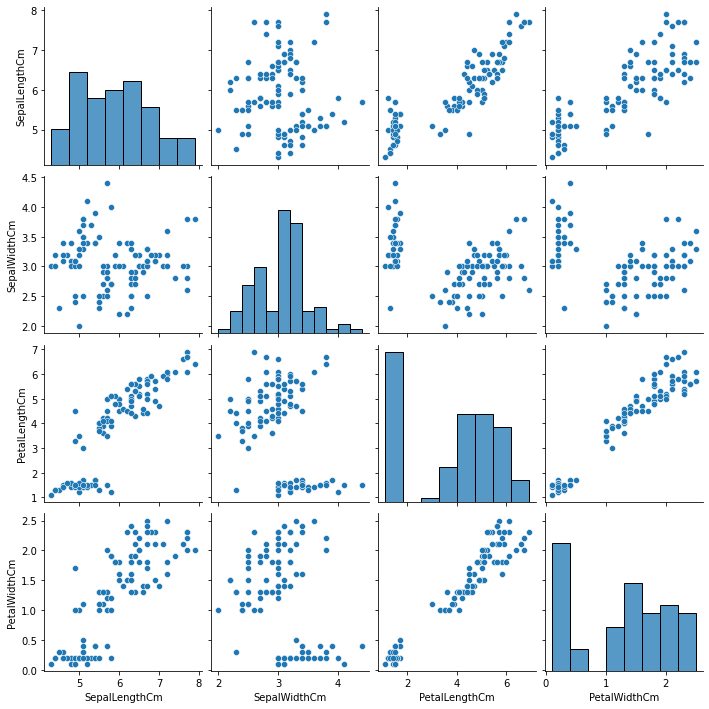

In [23]:
sns.pairplot(X_train)

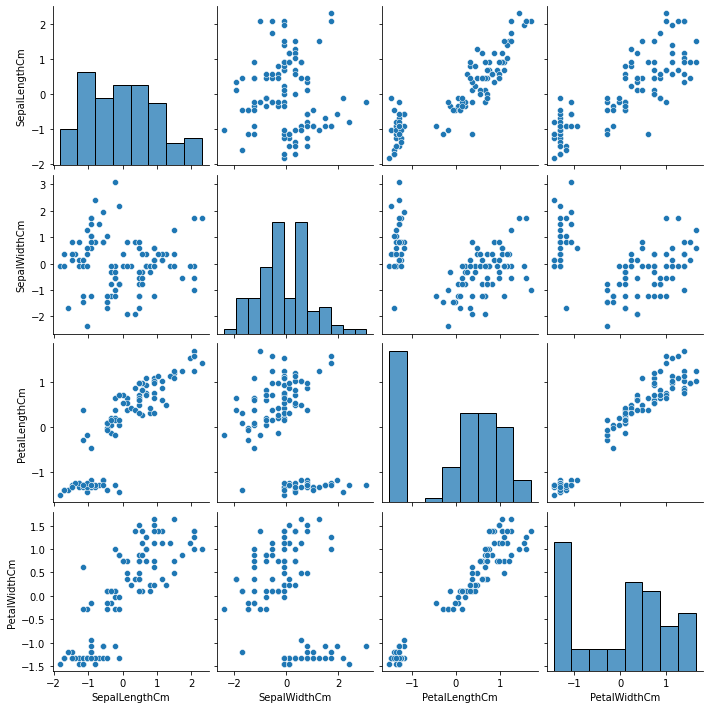

In [24]:
sns.pairplot(X_train_transformed);

In [25]:
X_test_transformed = scaler.transform(X_test)
print(X_test_transformed.shape)

(45, 4)


In [26]:
type(X_test_transformed)

numpy.ndarray

In [27]:
X_test_transformed = pd.DataFrame(X_test_transformed, columns=X_test.columns)

X_test_transformed.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.106950,-0.557215,0.707938,1.508728
1,0.122229,-1.923151,0.095452,-0.291459
2,-0.450718,2.629968,-1.352242,-1.320137
3,1.611888,-0.329559,1.376105,0.737219
4,-1.023664,0.808721,-1.296561,-1.320137


## (4). Data Traning and evaluation

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

classifier = LogisticRegression()
classifier.fit(X_train_transformed, y_train)

y_test_pred = classifier.predict(X_test_transformed)
y_test_pred

metrics.accuracy_score(y_test, y_test_pred)

0.9777777777777777

# Another way to build the model using 50% of input data:

### (1). Data Prepration

In [29]:
y = iris_data['Species']
X = iris_data[['SepalLengthCm','PetalWidthCm']]

In [30]:
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

In [31]:
X.head()

,SepalLengthCm,PetalWidthCm
0,5.1,0.2
1,4.9,0.2
2,4.7,0.2
3,4.6,0.2
4,5.0,0.2


In [32]:
# Data-preprocessing: Train & Test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, random_state= 0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(105, 2) (105,)
(45, 2) (45,)


In [33]:
type(X_train)

pandas.core.frame.DataFrame

In [34]:
# Data-preprocessing: Standardizing the data 

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# fit_transform converts the dataframe into numpy array
X_train_transformed = scaler.fit_transform(X_train)
print(X_train_transformed.shape)

(105, 2)


In [35]:
X_train.columns

Index(['SepalLengthCm', 'PetalWidthCm'], dtype='object')

In [36]:
X_train_transformed = pd.DataFrame(data=X_train_transformed, columns=X_train.columns)

X_train_transformed.head()

,SepalLengthCm,PetalWidthCm
0,-1.023664,-0.291459
1,0.695175,0.737219
2,0.924353,1.637313
3,0.122229,0.351465
4,0.924353,0.737219


In [37]:
X_train_transformed.describe()

,SepalLengthCm,PetalWidthCm
count,1.050000e+02,1.050000e+02
mean,-1.249794e-15,-2.051269e-16
std,1.004796e+00,1.004796e+00
min,-1.825788e+00,-1.448722e+00
25%,-9.090745e-01,-1.191552e+00
50%,-1.069499e-01,9.429550e-02
75%,6.951746e-01,8.658042e-01
max,2.299424e+00,1.637313e+00


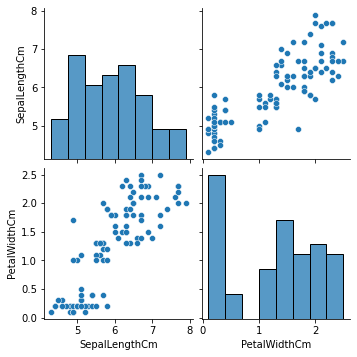

In [38]:
sns.pairplot(X_train);

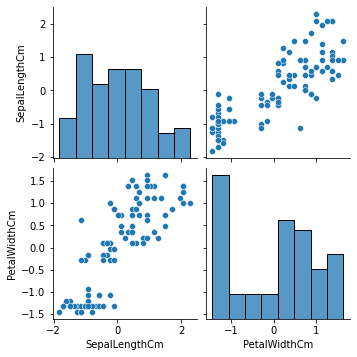

In [39]:
sns.pairplot(X_train_transformed);

In [40]:
X_test_transformed = scaler.transform(X_test)
print(X_test_transformed.shape)

(45, 2)


In [41]:
type(X_test_transformed)

numpy.ndarray

In [42]:
X_test_transformed = pd.DataFrame(X_test_transformed, columns=X_test.columns)

X_test_transformed.head()

,SepalLengthCm,PetalWidthCm
0,-0.106950,1.508728
1,0.122229,-0.291459
2,-0.450718,-1.320137
3,1.611888,0.737219
4,-1.023664,-1.320137


### (2). Traning Data 

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

classifier = LogisticRegression()
classifier.fit(X_train_transformed, y_train)

y_test_pred = classifier.predict(X_test_transformed)
y_test_pred

metrics.accuracy_score(y_test, y_test_pred)

0.9777777777777777

In [1]:
import numpy as np

In [2]:
array = np.array([160,140,150,155,145])
array

array([160, 140, 150, 155, 145])

In [3]:
array.mean()

150.0

In [4]:
array.std()

7.0710678118654755